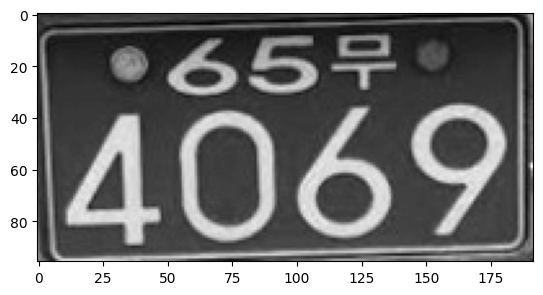

In [1193]:
import os, random, glob, sys, time

import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

img_path = glob.glob('data/*')
# shuffle the list
random.shuffle(img_path)
im = Image.open(img_path[0]).convert('L').resize((192, 96))
im = np.array(im)


# show via matplotlib
plt.imshow(im, cmap='gray')
plt.show()

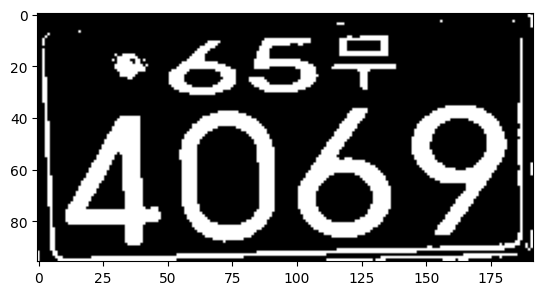

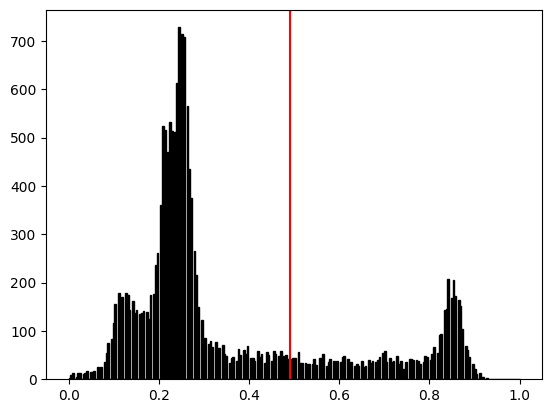

In [1194]:
# using kmeans to cluster the image to 2 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
# normalize the image via min-max normalization
im = (im - im.min()) / (im.max() - im.min())


# using otus method to get the threshold
from skimage.filters import threshold_otsu
thresh = threshold_otsu(im)
binary = im > thresh
plt.imshow(binary, cmap='gray')
plt.show()

# show threshold as histogram
plt.hist(im.ravel(), bins=256, range=(0, 1), fc='k', ec='k')
plt.axvline(thresh, color='r')
plt.show()

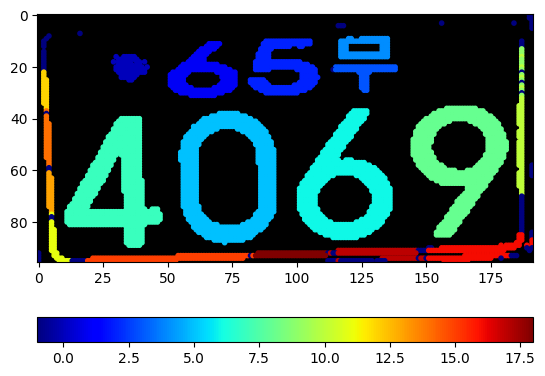

In [1195]:
# # gaussian blur
# from scipy.ndimage import gaussian_filter
# new_im = gaussian_filter(new_im, sigma=2)
# plt.imshow(new_im, cmap='gray')
# plt.show()

# image to 2d points
points = np.argwhere(binary > 0.5)

# using dbscan to cluster the points to clusters
from sklearn.cluster import *
# dbscan = DBSCAN(eps=2, min_samples=10)
dbscan = HDBSCAN(min_cluster_size=8)
dbscan.fit(points)
labels = dbscan.labels_
# get the number of clusters
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# transform the points to the original image
points = points[:, ::-1]
plt.imshow(np.ones(im.shape) * 255, cmap='gray')
plt.scatter(points[:, 0], points[:, 1], c=labels, cmap='jet', s=9)
# show color bar horizontally
plt.colorbar(orientation='horizontal')

plt.show()
